In [1]:
import petl

import math
from petl import look, fromdb, select, selecteq, convert, fieldmap,fromcsv

def rotate(row,*args):
 
    #Rotates a point counterclockwise by a given angle around a given origin.

    ox, oy = args[0]
    angle =  math.radians(args[1])
    mode=args[2]
    if mode=="usp":
        px, py = row['UnitStartPointX'],row['UnitStartPointY']
    if mode=="uep":
        px, py = row['UnitEndPointX'],row['UnitEndPointY']
    if mode=="sp":        
        px, py = row['StartPointX'],row['StartPointY']  
    if mode=="ep":          
        px, py = row['EndPointX'],row['EndPointY']  
    if mode=="cen":  
        px, py = row['CentroidX'],row['CentroidY'] 
    if mode=="ucen":  
        px, py = row['UnitCentroidX'],row['UnitCentroidY']

    qx = (ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy))-ox
    qy = (oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy))-oy
 
    return qx, qy

In [2]:
# Stores data from csv files generated by Dynamo

unitdata = fromcsv('unit data + test.csv')
unitboundaries = fromcsv('department boundaries + test data.csv')
roomdata = fromcsv('wall data.csv')
roomboundaries = fromcsv('room boundaries.csv')

look(unitdata)

+----------+----------------+----------------+-----------------+-----------------+-------------+
| UnitType | UnitArea       | UnitPerimeter  | UnitCentroidX   | UnitCentroidY   | Orientation |
+==========+================+================+=================+=================+=============+
| u'E'     | u'912.1952098' | u'132.1600648' | u'-97.11909379' | u'-267.8311667' | u'180'      |
+----------+----------------+----------------+-----------------+-----------------+-------------+
| u'D3'    | u'880.9136004' | u'132.9308134' | u'-28.19175947' | u'-268.0811667' | u'180'      |
+----------+----------------+----------------+-----------------+-----------------+-------------+
| u'C'     | u'845.7554181' | u'127.7695404' | u'110.0670959'  | u'-267.3022149' | u'180'      |
+----------+----------------+----------------+-----------------+-----------------+-------------+
| u'B3'    | u'928.5488436' | u'137.0195621' | u'114.4101702'  | u'-129.888185'  | u'90'       |
+----------+----------------+-

In [3]:
look(unitboundaries)

+----------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+
| UnitType | UnitBoundaryName | UnitStartPointX | UnitStartPointY | UnitEndPointX   | UnitEndPointY   | UnitLength     |
+==========+==================+=================+=================+=================+=================+================+
| u'E'     | u'UB001'         | u'-115.147434'  | u'-266.2434811' | u'-115.147434'  | u'-281.5969985' | u'15.35351733' |
+----------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+
| u'E'     | u'UB002'         | u'-115.147434'  | u'-281.5969985' | u'-102.1371021' | u'-281.5969985' | u'13.01033197' |
+----------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+
| u'E'     | u'UB003'         | u'-102.1371021' | u'-281.5969985' | u'-102.1371021' | u'-278.9303318' | u'2.666666667' |
+----------+------------------+-

In [4]:
look(roomdata)

+----------+----------------+-------------+----------------+----------------+-----------------+----------------+
| UnitType | Name           | Room Number | Area           | Perimeter      | CentroidX       | CentroidY      |
+==========+================+=============+================+================+=================+================+
| u'A'     | u'LIVING ROOM' | u'RN004'    | u'145.7310587' | u'49.07308606' | u'-68.37886176' | u'8.835120359' |
+----------+----------------+-------------+----------------+----------------+-----------------+----------------+
| u'A'     | u'BEDROOM 2'   | u'RN005'    | u'208.5160724' | u'65.63541667' | u'-81.46342461' | u'4.616329578' |
+----------+----------------+-------------+----------------+----------------+-----------------+----------------+
| u'A'     | u'BATHROOM 2'  | u'RN006'    | u'59.64078869' | u'32.68755952' | u'-83.09012749' | u'19.06901886' |
+----------+----------------+-------------+----------------+----------------+-----------------+-

In [5]:
look(roomboundaries)

+-----------+--------------------+----------------+-----------------+----------------+-----------------+----------------+----------------+
| Unit Type | Unit Boundary Name | Name           | StartPointX     | StartPointY    | EndPointX       | EndPointY      | Length         |
+===========+====================+================+=================+================+=================+================+================+
| u'A'      | u'R0034'           | u'LIVING ROOM' | u'-74.8766007'  | u'3.027352192' | u'-62.23589101' | u'3.027352192' | u'12.64070969' |
+-----------+--------------------+----------------+-----------------+----------------+-----------------+----------------+----------------+
| u'A'      | u'R0035'           | u'LIVING ROOM' | u'-62.23589101' | u'3.027352192' | u'-62.23589101' | u'14.92318553' | u'11.89583333' |
+-----------+--------------------+----------------+-----------------+----------------+-----------------+----------------+----------------+
| u'A'      | u'R0036'     

In [6]:
#Converts the values from long values to integers 

convertintud = convert(unitdata, ('UnitArea', 'UnitPerimeter', 'UnitCentroidX', 'UnitCentroidY', 'Orientation'), lambda v: int(float(v)))
convertintub = convert(unitboundaries, ('UnitStartPointX', 'UnitStartPointY', 'UnitEndPointX', 'UnitEndPointY', 'UnitLength'), lambda v: int(float(v)))
convertintrd = convert(roomdata, ('Area', 'Perimeter', 'CentroidX', 'CentroidY'), lambda v:int (float(v)))
convertintrb = convert(roomboundaries, ('StartPointX', 'StartPointY', 'EndPointX', 'EndPointY', 'Length'), lambda v: int(float(v)))

In [7]:
look(convertintub)

+----------+------------------+-----------------+-----------------+---------------+---------------+------------+
| UnitType | UnitBoundaryName | UnitStartPointX | UnitStartPointY | UnitEndPointX | UnitEndPointY | UnitLength |
+==========+==================+=================+=================+===============+===============+============+
| u'E'     | u'UB001'         |            -115 |            -266 |          -115 |          -281 |         15 |
+----------+------------------+-----------------+-----------------+---------------+---------------+------------+
| u'E'     | u'UB002'         |            -115 |            -281 |          -102 |          -281 |         13 |
+----------+------------------+-----------------+-----------------+---------------+---------------+------------+
| u'E'     | u'UB003'         |            -102 |            -281 |          -102 |          -278 |          2 |
+----------+------------------+-----------------+-----------------+---------------+-------------

In [8]:
from petl import fromdataframe, todataframe
import pandas as pd

# Converts each table to panda dataframe for preprocessing

pd.options.mode.chained_assignment = None
unitdataframe=todataframe(convertintud)
unitboundariesframe=todataframe(convertintub)
roomdataframe=todataframe(convertintrd)
roomboundariesframe=todataframe(convertintrb)



In [9]:
Testunit=["TEST A","TEST B","TEST C","TEST D","TEST E"]

In [10]:
# Iterates over rows in unitdata and orienting X and Y in unitboundaries according to centroids and orientation in unit data

for index,row in unitdataframe.iterrows():
    #select unittype, origin, orientation from unit data
    
    
    unittype=row['UnitType']
    origin=[row['UnitCentroidX'],row['UnitCentroidY']]
    orientation=row['Orientation']
    
    # select rows of unittype in unitboundaries in temp dataframe
    temp=unitboundariesframe[unitboundariesframe.UnitType==unittype]
    
    #assign return values to StartPointX and StartPointY column
    temp['UnitStartPointX'],temp['UnitStartPointY']=zip(*temp.apply(rotate,args=(origin,orientation,'usp'),axis=1))
    
    #assign return values to EndPointX and EndPointY column
    temp['UnitEndPointX'],temp['UnitEndPointY']=zip(*temp.apply(rotate,args=(origin,orientation,'uep'),axis=1))
    
    #reassign the oriented rows to original unitboundaries frame
    unitboundariesframe[unitboundariesframe.UnitType==unittype]=temp

    
    
# Creates dataframe with oriented values
rotatedunitboundaries=unitboundariesframe.copy()
rotatedunitboundaries.head()


,UnitType,UnitBoundaryName,UnitStartPointX,UnitStartPointY,UnitEndPointX,UnitEndPointY,UnitLength
0,E,UB001,18.0,-1.0,18.0,14.0,15
1,E,UB002,18.0,14.0,5.0,14.0,13
2,E,UB003,5.0,14.0,5.0,11.0,2
3,E,UB004,5.0,11.0,-8.0,11.0,12
4,E,UB005,-8.0,11.0,-8.0,14.0,2


In [11]:
for index,row in unitdataframe.iterrows():
    
    unittype=row['UnitType']
    origin=[row['UnitCentroidX'],row['UnitCentroidY']]
    orientation=row['Orientation']
    if unittype not in Testunit:
        temp=roomboundariesframe[roomboundariesframe['Unit Type']==unittype]


        temp['StartPointX'],temp['StartPointY']=zip(*temp.apply(rotate,args=(origin,orientation,'sp'),axis=1))

        temp['EndPointX'],temp['EndPointY']=zip(*temp.apply(rotate,args=(origin,orientation,'ep'),axis=1))

        roomboundariesframe[roomboundariesframe['Unit Type']==unittype]=temp


rotatedroomboundaries=roomboundariesframe.copy()
rotatedroomboundaries                       


,Unit Type,Unit Boundary Name,Name,StartPointX,StartPointY,EndPointX,EndPointY,Length
0,A,R0034,LIVING ROOM,5.0,9.0,-7.0,9.0,12
1,A,R0035,LIVING ROOM,-7.0,9.0,-7.0,-2.0,11
2,A,R0036,LIVING ROOM,-7.0,-2.0,-2.0,-2.0,5
3,A,R0037,LIVING ROOM,-2.0,-2.0,-1.0,-2.0,1
4,A,R0038,LIVING ROOM,-1.0,-2.0,4.0,-2.0,4
5,A,R0039,LIVING ROOM,4.0,-2.0,4.0,1.0,3
6,A,R0040,LIVING ROOM,4.0,1.0,5.0,1.0,1
7,A,R0041,LIVING ROOM,5.0,1.0,5.0,9.0,8
8,A,R0042,BEDROOM 2,19.0,15.0,6.0,15.0,13
9,A,R0043,BEDROOM 2,6.0,15.0,6.0,10.0,6


In [12]:
for index,row in unitdataframe.iterrows():
    
    unittype=row['UnitType']
    origin=[row['UnitCentroidX'],row['UnitCentroidY']]
    orientation=row['Orientation']
    if unittype not in Testunit:
        
        temp=roomdataframe[roomdataframe.UnitType==unittype]

        temp['CentroidX'],temp['CentroidY']=zip(*temp.apply(rotate,args=(origin,orientation,'cen'),axis=1))

        roomdataframe[roomdataframe.UnitType==unittype]=temp


rotatedroomdata=roomdataframe.copy()
rotatedroomdata

,UnitType,Name,Room Number,Area,Perimeter,CentroidX,CentroidY
0,A,LIVING ROOM,RN004,145,49,-1.0,4.000000e+00
1,A,BEDROOM 2,RN005,208,65,12.0,8.000000e+00
2,A,BATHROOM 2,RN006,59,32,14.0,-7.000000e+00
3,A,CLOSET 2,RN007,35,23,16.0,-1.776357e-15
4,A,BEDROOM 1,RN008,148,55,-13.0,2.000000e+00
5,A,ENTRY,RN014,63,38,2.0,-7.000000e+00
6,A,KITCHEN,RN029,88,37,-5.0,-8.000000e+00
7,A,CLOSET 1,RN030,19,17,-16.0,-6.000000e+00
8,A,BATHROOM 1,RN031,45,27,-14.0,-1.100000e+01
9,A,UTILITY,RN072,10,12,6.0,-8.000000e+00


In [13]:
for index,row in unitdataframe.iterrows():
    
    unittype=row['UnitType']
    origin=[row['UnitCentroidX'],row['UnitCentroidY']]
    orientation=row['Orientation']
   
    temp=unitdataframe[unitdataframe.UnitType==unittype]
    
    temp['UnitCentroidX'],temp['UnitCentroidY']=zip(*temp.apply(rotate,args=(origin,orientation,'ucen'),axis=1))
    
    unitdataframe[unitdataframe.UnitType==unittype]=temp


rotatedunitdata=unitdataframe.copy()
rotatedunitdata

,UnitType,UnitArea,UnitPerimeter,UnitCentroidX,UnitCentroidY,Orientation
0,E,912,132,0.0,0.0,180
1,D3,880,132,0.0,0.0,180
2,C,845,127,0.0,0.0,180
3,B3,928,137,0.0,0.0,90
4,D2,835,124,0.0,0.0,270
5,D,821,122,0.0,0.0,270
6,B2,887,128,0.0,0.0,180
7,B4,873,126,0.0,0.0,0
8,B,872,126,0.0,0.0,0
9,F,834,127,0.0,0.0,0


In [14]:
# Calculates number of segments as dict

segments=rotatedroomboundaries.groupby(['Unit Type','Name']).size().to_dict()
segments


{(u'A', u'BATHROOM 1'): 5,
 (u'A', u'BATHROOM 2'): 7,
 (u'A', u'BEDROOM 1'): 8,
 (u'A', u'BEDROOM 2'): 11,
 (u'A', u'CLOSET 1'): 4,
 (u'A', u'CLOSET 2'): 4,
 (u'A', u'ENTRY'): 13,
 (u'A', u'HVAC'): 6,
 (u'A', u'KITCHEN'): 13,
 (u'A', u'LIVING ROOM'): 8,
 (u'A', u'UTILITY'): 4,
 (u'B', u'BATHROOM 1'): 6,
 (u'B', u'BATHROOM 2'): 5,
 (u'B', u'BEDROOM 1'): 12,
 (u'B', u'BEDROOM 2'): 10,
 (u'B', u'CLOSET 1'): 4,
 (u'B', u'CLOSET 2'): 4,
 (u'B', u'ENTRY'): 10,
 (u'B', u'HVAC'): 6,
 (u'B', u'KITCHEN'): 13,
 (u'B', u'LIVING ROOM'): 12,
 (u'B', u'UTILITY'): 5,
 (u'B2', u'BATHROOM 1'): 6,
 (u'B2', u'BATHROOM 2'): 5,
 (u'B2', u'BEDROOM 1'): 11,
 (u'B2', u'BEDROOM 2'): 10,
 (u'B2', u'CLOSET 1'): 4,
 (u'B2', u'CLOSET 2'): 4,
 (u'B2', u'ENTRY'): 11,
 (u'B2', u'HVAC'): 6,
 (u'B2', u'KITCHEN'): 15,
 (u'B2', u'LIVING ROOM'): 10,
 (u'B2', u'UTILITY'): 6,
 (u'B3', u'BATHROOM 1'): 6,
 (u'B3', u'BATHROOM 2'): 5,
 (u'B3', u'BEDROOM 1'): 12,
 (u'B3', u'BEDROOM 2'): 14,
 (u'B3', u'CLOSET 1'): 4,
 (u'B3', u'CL

In [15]:
sumperunit=rotatedroomdata.groupby(['UnitType'])['Area'].sum().to_dict()


def percent(row):
    return float(row['Area'])/sumperunit[row['UnitType']]*100
rotatedroomdata['percentage']=rotatedroomdata[['UnitType','Area']].apply(percent,axis=1)

rotatedroomdata.head()

,UnitType,Name,Room Number,Area,Perimeter,CentroidX,CentroidY,percentage
0,A,LIVING ROOM,RN004,145,49,-1.0,4.000000e+00,17.490953
1,A,BEDROOM 2,RN005,208,65,12.0,8.000000e+00,25.090470
2,A,BATHROOM 2,RN006,59,32,14.0,-7.000000e+00,7.117008
3,A,CLOSET 2,RN007,35,23,16.0,-1.776357e-15,4.221954
4,A,BEDROOM 1,RN008,148,55,-13.0,2.000000e+00,17.852835


In [16]:
# Merges the start and endpoint values into tuples

rotatedunitboundaries['Xtuple']=zip(rotatedunitboundaries.UnitStartPointX,rotatedunitboundaries.UnitEndPointX)
rotatedunitboundaries['Ytuple']=zip(rotatedunitboundaries.UnitStartPointY,rotatedunitboundaries.UnitEndPointY)


rotatedunitboundaries.head()

,UnitType,UnitBoundaryName,UnitStartPointX,UnitStartPointY,UnitEndPointX,UnitEndPointY,UnitLength,Xtuple,Ytuple
0,E,UB001,18.0,-1.0,18.0,14.0,15,"(18.0, 18.0)","(-1.0, 14.0)"
1,E,UB002,18.0,14.0,5.0,14.0,13,"(18.0, 5.0)","(14.0, 14.0)"
2,E,UB003,5.0,14.0,5.0,11.0,2,"(5.0, 5.0)","(14.0, 11.0)"
3,E,UB004,5.0,11.0,-8.0,11.0,12,"(5.0, -8.0)","(11.0, 11.0)"
4,E,UB005,-8.0,11.0,-8.0,14.0,2,"(-8.0, -8.0)","(11.0, 14.0)"


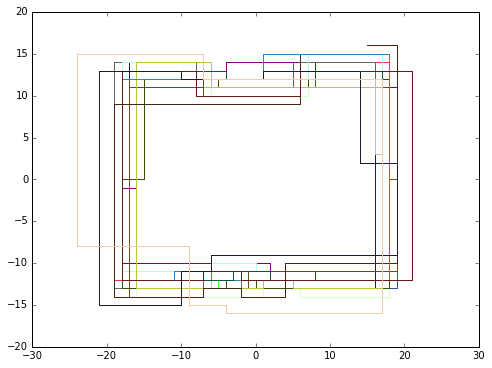

In [17]:
# Plotting for unit boundaries type

#dictionary of color codes for each unit type
colorcode={'E':'#e52b50','D3':'#191970','C':'#800080','B3':'#666666','D2':'#d3ffce','D':'#d5b6b6','B2':'#b6fcd5','B4':'#315198','B':'#58f52e','F':'#684a1b','G':'#355205','D4':'#b8c640','A':'#492515','TEST A':'#2E86C1','TEST B':'#0B5345','TEST C':'#641E16','TEST D':'#17202A','TEST E':'#F5CBA7'}
import matplotlib.pyplot as plt
%matplotlib inline

# list of uniques types in unitboundaries
types=rotatedunitboundaries.UnitType.unique()


# Iterates over each unittype

plt.figure(figsize=(8,6))
for t in types:
#selected rows of one type only
    rows=rotatedunitboundaries[rotatedunitboundaries.UnitType==t]

    #plotting each row 
    for index,row in rows.iterrows():
        xpair=row['Xtuple']
        ypair=row['Ytuple']

        plt.plot(xpair,ypair,color=colorcode[t])

plt.show()
plt.close()

In [18]:

# Merges the start and endpoint values into tuples

rotatedroomboundaries['Xtuple']=zip(rotatedroomboundaries.StartPointX,rotatedroomboundaries.EndPointX)
rotatedroomboundaries['Ytuple']=zip(rotatedroomboundaries.StartPointY,rotatedroomboundaries.EndPointY)


rotatedroomboundaries.head()

,Unit Type,Unit Boundary Name,Name,StartPointX,StartPointY,EndPointX,EndPointY,Length,Xtuple,Ytuple
0,A,R0034,LIVING ROOM,5.0,9.0,-7.0,9.0,12,"(5.0, -7.0)","(9.0, 9.0)"
1,A,R0035,LIVING ROOM,-7.0,9.0,-7.0,-2.0,11,"(-7.0, -7.0)","(9.0, -2.0)"
2,A,R0036,LIVING ROOM,-7.0,-2.0,-2.0,-2.0,5,"(-7.0, -2.0)","(-2.0, -2.0)"
3,A,R0037,LIVING ROOM,-2.0,-2.0,-1.0,-2.0,1,"(-2.0, -1.0)","(-2.0, -2.0)"
4,A,R0038,LIVING ROOM,-1.0,-2.0,4.0,-2.0,4,"(-1.0, 4.0)","(-2.0, -2.0)"


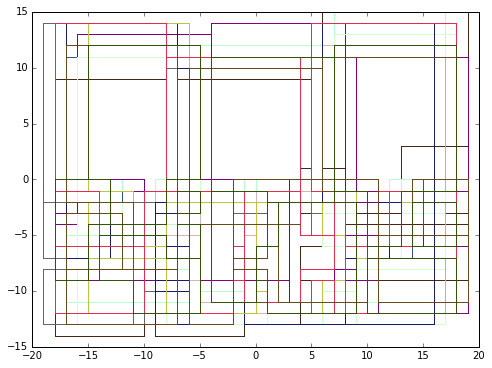

In [19]:
#plotting for room boundaries type
types=rotatedroomboundaries['Unit Type'].unique()
plt.figure(figsize=(8,6))
for t in types:
    
    rows=rotatedroomboundaries[rotatedroomboundaries['Unit Type']==t]

    for index,row in rows.iterrows():
        xpair=row['Xtuple']
        ypair=row['Ytuple']

        plt.plot(xpair,ypair,color=colorcode[t])
plt.show()
plt.close()

Enter UnitTypeA


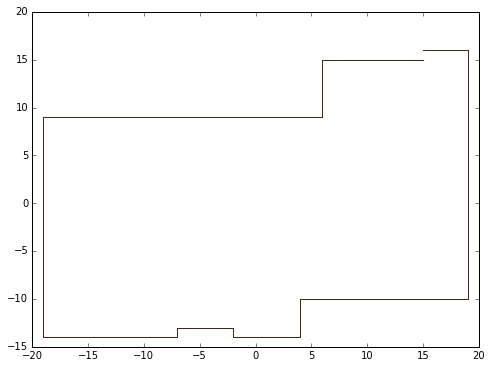

In [20]:
# plotting specific unit boundaries based on user input

unittype=raw_input("Enter UnitType")
rows=rotatedunitboundaries[rotatedunitboundaries.UnitType==unittype]
plt.figure(figsize=(8,6))
#plotting each rows 
for index,row in rows.iterrows():
    xpair=row['Xtuple']
    ypair=row['Ytuple']
    plt.plot(xpair,ypair,color=colorcode[unittype])
   
    
plt.show()
plt.close()

Enter UnitTypeA


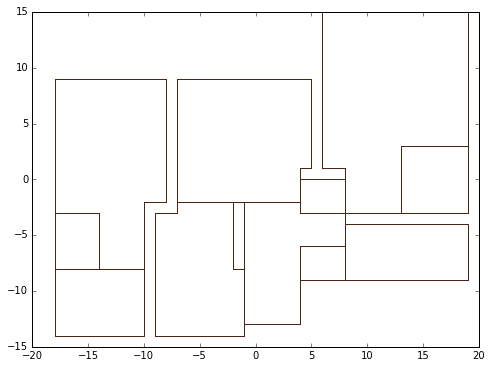

In [21]:
# plotting specific room boundaries based on user input


unittype=raw_input("Enter UnitType")
rows=rotatedroomboundaries[rotatedroomboundaries['Unit Type']==unittype]
plt.figure(figsize=(8,6))
#plotting each row 
for index,row in rows.iterrows():
    xpair=row['Xtuple']
    ypair=row['Ytuple']
    plt.plot(xpair,ypair,color=colorcode[unittype])
    
plt.show()
plt.close()

Enter Room NameKITCHEN


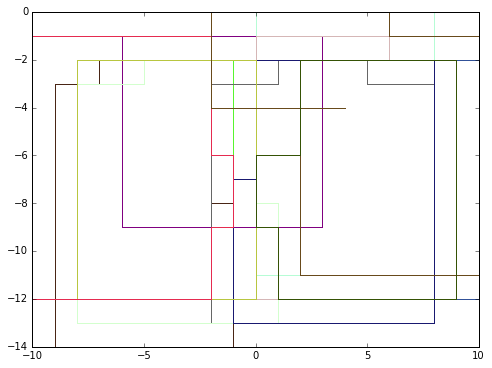

In [22]:
#plotting room based on room names
roomname=raw_input("Enter Room Name")

types=rotatedroomboundaries['Unit Type'].unique()
plt.figure(figsize=(8,6))
for t in types:
    rows=rotatedroomboundaries[(rotatedroomboundaries['Unit Type']==t) & (rotatedroomboundaries['Name']==roomname) ]
    
    for index,row in rows.iterrows():
        xpair=row['Xtuple']
        ypair=row['Ytuple']
        
        plt.plot(xpair,ypair,color=colorcode[t])
plt.show()
plt.close()

In [23]:
# Merges the start and endpoint values into tuples

rotatedunitboundaries['Starttuple']=zip(rotatedunitboundaries.UnitStartPointX,rotatedunitboundaries.UnitStartPointY)
rotatedunitboundaries['Endtuple']=zip(rotatedunitboundaries.UnitEndPointX,rotatedunitboundaries.UnitEndPointY)
rotatedunitboundaries.head()

,UnitType,UnitBoundaryName,UnitStartPointX,UnitStartPointY,UnitEndPointX,UnitEndPointY,UnitLength,Xtuple,Ytuple,Starttuple,Endtuple
0,E,UB001,18.0,-1.0,18.0,14.0,15,"(18.0, 18.0)","(-1.0, 14.0)","(18.0, -1.0)","(18.0, 14.0)"
1,E,UB002,18.0,14.0,5.0,14.0,13,"(18.0, 5.0)","(14.0, 14.0)","(18.0, 14.0)","(5.0, 14.0)"
2,E,UB003,5.0,14.0,5.0,11.0,2,"(5.0, 5.0)","(14.0, 11.0)","(5.0, 14.0)","(5.0, 11.0)"
3,E,UB004,5.0,11.0,-8.0,11.0,12,"(5.0, -8.0)","(11.0, 11.0)","(5.0, 11.0)","(-8.0, 11.0)"
4,E,UB005,-8.0,11.0,-8.0,14.0,2,"(-8.0, -8.0)","(11.0, 14.0)","(-8.0, 11.0)","(-8.0, 14.0)"


In [24]:
# Merges the start and endpoint values into tuples

rotatedroomboundaries['Starttuple']=zip(rotatedroomboundaries.StartPointX,rotatedroomboundaries.StartPointY)
rotatedroomboundaries['Endtuple']=zip(rotatedroomboundaries.EndPointX,rotatedroomboundaries.EndPointY)
rotatedroomboundaries.head()

,Unit Type,Unit Boundary Name,Name,StartPointX,StartPointY,EndPointX,EndPointY,Length,Xtuple,Ytuple,Starttuple,Endtuple
0,A,R0034,LIVING ROOM,5.0,9.0,-7.0,9.0,12,"(5.0, -7.0)","(9.0, 9.0)","(5.0, 9.0)","(-7.0, 9.0)"
1,A,R0035,LIVING ROOM,-7.0,9.0,-7.0,-2.0,11,"(-7.0, -7.0)","(9.0, -2.0)","(-7.0, 9.0)","(-7.0, -2.0)"
2,A,R0036,LIVING ROOM,-7.0,-2.0,-2.0,-2.0,5,"(-7.0, -2.0)","(-2.0, -2.0)","(-7.0, -2.0)","(-2.0, -2.0)"
3,A,R0037,LIVING ROOM,-2.0,-2.0,-1.0,-2.0,1,"(-2.0, -1.0)","(-2.0, -2.0)","(-2.0, -2.0)","(-1.0, -2.0)"
4,A,R0038,LIVING ROOM,-1.0,-2.0,4.0,-2.0,4,"(-1.0, 4.0)","(-2.0, -2.0)","(-1.0, -2.0)","(4.0, -2.0)"


In [25]:
def closest(s,points):
    distance=[]
    for p in points:
        distance.append( abs( s[0]-p[0] ) + abs( s[1]-p[1] ) )
        #print p,distance
    
    return points[distance.index(min(distance))]


        

In [26]:
def order(points):
    ordered=[]
    ordered.append(points.pop(0))
    for i in range(1,len(points)+1):
        
        close=closest(ordered[i-1],points)
        ordered.append(close)
        points.remove(close)
        
    return ordered
    

Enter unit TypeA


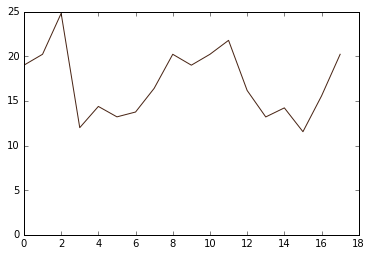

In [27]:
#shape descriptor for specific unitType based on user input
from shapely.geometry import Polygon
from shapely.geometry import LineString
from shapely.geometry import Point
import numpy as np
import math

unittype=raw_input("Enter unit Type")
selected=rotatedunitboundaries[rotatedunitboundaries.UnitType==unittype]
polypoint=selected.Starttuple.tolist()+selected.Endtuple.tolist()


cx=rotatedunitdata[rotatedunitdata.UnitType==unittype]['UnitCentroidX'].values[0]
cy=rotatedunitdata[rotatedunitdata.UnitType==unittype]['UnitCentroidY'].values[0]
centroid=[cx,cy]

polypoint=order(polypoint)
poly=Polygon(polypoint)

distances=[]
for i in range(0,360,20):
    angle=math.radians(i)
    x,y=1000*math.cos(angle)+centroid[0],1000*math.sin(angle)+centroid[1]
    ring = LineString(list(poly.exterior.coords))
    line=LineString([centroid,(x,y)])
    intersect=ring.intersection(line)
    distances.append(intersect.distance(Point(centroid)))
plt.axis([0,18,0,25])
plt.plot(range(18),distances,color=colorcode[unittype])

plt.show()
plt.close()

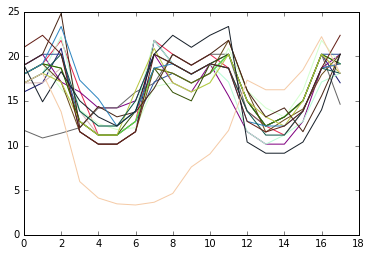

In [28]:
#shape descriptor for each unit type and adding shape descriptor to unit data 

rotatedunitdata['shape']=None
plt.axis([0,18,0,25])
types=rotatedunitdata.UnitType.unique()

for unittype in types:
    
    selected=rotatedunitboundaries[rotatedunitboundaries.UnitType==unittype]
    polypoint=selected.Starttuple.tolist()+selected.Endtuple.tolist()


    cx=rotatedunitdata[rotatedunitdata.UnitType==unittype]['UnitCentroidX'].values[0]
    cy=rotatedunitdata[rotatedunitdata.UnitType==unittype]['UnitCentroidY'].values[0]
    centroid=[cx,cy]

    polypoint=order(polypoint)
    poly=Polygon(polypoint)
    
    distances=[]
    for i in range(0,360,20):
        angle=math.radians(i)
        x,y=1000*math.cos(angle)+centroid[0],1000*math.sin(angle)+centroid[1]
        ring = LineString(list(poly.exterior.coords))
        line=LineString([centroid,(x,y)])
        intersect=ring.intersection(line)
        distances.append(intersect.distance(Point(centroid)))
    
    plt.plot(range(18),distances,color=colorcode[unittype])
    rowindex=rotatedunitdata[rotatedunitdata.UnitType==unittype].index[0]
    
    rotatedunitdata.set_value(rowindex,'shape',distances)
plt.show()
plt.close()

Enter room nameKITCHEN
Enter Unit TypeA


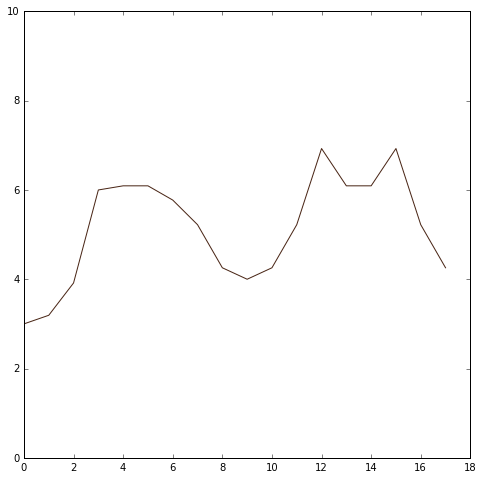

In [29]:
#shape descriptor for room boundaries based on room name for each unit type

plt.figure(figsize=(8,8))
plt.axis([0,18,0,10])
room =raw_input("Enter room name")
unittype=raw_input("Enter Unit Type")
    
selected=rotatedroomboundaries[(rotatedroomboundaries['Unit Type']==unittype) & (rotatedroomboundaries.Name==room)]
if len(selected)==0:
    print 'Room does not exist in this unit'
else:
    polypoint=selected.Starttuple.tolist()+selected.Endtuple.tolist()
    cx=rotatedroomdata[(rotatedroomdata.UnitType==unittype)&(rotatedroomdata.Name==room)]['CentroidX'].values[0]
    cy=rotatedroomdata[(rotatedroomdata.UnitType==unittype)&(rotatedroomdata.Name==room)]['CentroidY'].values[0]
    centroid=[cx,cy]

    polypoint=order(polypoint)
    poly=Polygon(polypoint)

    distances=[]
    for i in range(0,360,20):
        angle=math.radians(i)
        x,y=1000*math.cos(angle)+centroid[0],1000*math.sin(angle)+centroid[1]
        ring = LineString(list(poly.exterior.coords))
        line=LineString([centroid,(x,y)])
        intersect=ring.intersection(line)
        distances.append(intersect.distance(Point(centroid)))
    
    plt.plot(range(18),distances,color=colorcode[unittype])
    plt.show()
    plt.close()

Enter room nameKITCHEN


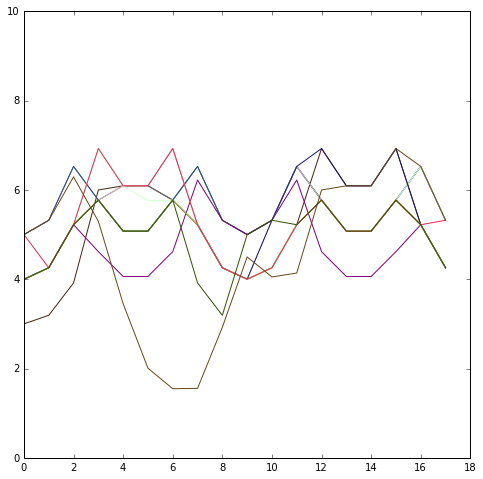

In [30]:
# shape  descriptor for room boundaries based on room name for each unit type

plt.figure(figsize=(8,8))
plt.axis([0,18,0,10])
room =raw_input("Enter room name")
types=rotatedroomboundaries['Unit Type'].unique()
for unittype in types:
    
    selected=rotatedroomboundaries[(rotatedroomboundaries['Unit Type']==unittype) & (rotatedroomboundaries.Name==room)]
    if len(selected)==0:
        continue
    polypoint=selected.Starttuple.tolist()+selected.Endtuple.tolist()
    cx=rotatedroomdata[(rotatedroomdata.UnitType==unittype)&(rotatedroomdata.Name==room)]['CentroidX'].values[0]
    cy=rotatedroomdata[(rotatedroomdata.UnitType==unittype)&(rotatedroomdata.Name==room)]['CentroidY'].values[0]
    centroid=[cx,cy]
    
    polypoint=order(polypoint)
    poly=Polygon(polypoint)

    distances=[]
    for i in range(0,360,20):
        angle=math.radians(i)
        x,y=1000*math.cos(angle)+centroid[0],1000*math.sin(angle)+centroid[1]
        ring = LineString(list(poly.exterior.coords))
        line=LineString([centroid,(x,y)])
        intersect=ring.intersection(line)
        distances.append(intersect.distance(Point(centroid)))
      
    plt.plot(range(18),distances,color=colorcode[unittype])
plt.show()
plt.close()

In [31]:
#Adds the shape descriptors to the rotatedroomdata table 

rotatedroomdata['shape']=None
#plt.figure(figsize=(8,8))
#plt.axis([0,18,0,10])
rooms =rotatedroomdata.Name.unique()
types=rotatedroomboundaries['Unit Type'].unique()
for room in rooms:
    for unittype in types:
    
        selected=rotatedroomboundaries[(rotatedroomboundaries['Unit Type']==unittype) & (rotatedroomboundaries.Name==room)]
        if len(selected)==0:
            continue
        
        polypoint=selected.Starttuple.tolist()+selected.Endtuple.tolist()
        cx=rotatedroomdata[(rotatedroomdata.UnitType==unittype)&(rotatedroomdata.Name==room)]['CentroidX'].values[0]
        cy=rotatedroomdata[(rotatedroomdata.UnitType==unittype)&(rotatedroomdata.Name==room)]['CentroidY'].values[0]
        centroid=[cx,cy]

        polypoint=order(polypoint)
        poly=Polygon(polypoint)

        distances=[]
        for i in range(0,360,20):
            angle=math.radians(i)
            x,y=1000*math.cos(angle)+centroid[0],1000*math.sin(angle)+centroid[1]
            ring = LineString(list(poly.exterior.coords))
            line=LineString([centroid,(x,y)])
            intersect=ring.intersection(line)
            distances.append(intersect.distance(Point(centroid)))
        
        #plt.plot(range(18),distances,color=colorcode[unittype])
        
        rowindex=rotatedroomdata[(rotatedroomdata.Name==room)& (rotatedroomdata.UnitType==unittype)].index[0]
        
        rotatedroomdata.set_value(rowindex,'shape',distances)
#plt.show()
#plt.close()

In [32]:
#After adding the shape descriptors to rotatedunitdata
rotatedunitdata


,UnitType,UnitArea,UnitPerimeter,UnitCentroidX,UnitCentroidY,Orientation,shape
0,E,912,132,0.0,0.0,180,"[18.0, 19.1551999046, 21.780133576, 16.1658075..."
1,D3,880,132,0.0,0.0,180,"[16.0, 17.0268443596, 20.8865166293, 11.547005..."
2,C,845,127,0.0,0.0,180,"[19.0, 20.219377677, 17.1129620955, 16.0, 14.2..."
3,B3,928,137,0.0,0.0,90,"[11.7037037037, 10.8464626334, 11.3858021265, ..."
4,D2,835,124,0.0,0.0,270,"[18.0, 19.1551999046, 16.3372276257, 14.0, 12...."
5,D,821,122,0.0,0.0,270,"[17.0, 17.0268443596, 18.6686859223, 13.856406..."
6,B2,887,128,0.0,0.0,180,"[17.0, 18.0910221321, 22.1919239186, 13.856406..."
7,B4,873,126,0.0,0.0,0,"[19.0, 20.219377677, 20.2244097492, 12.7017059..."
8,B,872,126,0.0,0.0,0,"[18.0, 19.1551999046, 18.6686859223, 12.701705..."
9,F,834,127,0.0,0.0,0,"[18.0, 19.1551999046, 17.1129620955, 11.547005..."


In [33]:
#After adding the shape descriptors to the rotatedroomdata 
rotatedroomdata

,UnitType,Name,Room Number,Area,Perimeter,CentroidX,CentroidY,percentage,shape
0,A,LIVING ROOM,RN004,145,49,-1.0,4.000000e+00,17.490953,"[6.0, 6.38506663486, 7.7786191343, 5.773502691..."
1,A,BEDROOM 2,RN005,208,65,12.0,8.000000e+00,25.090470,"[7.0, 7.44924440733, 9.13785102533, 8.08290376..."
2,A,BATHROOM 2,RN006,59,32,14.0,-7.000000e+00,7.117008,"[5.0, 5.32088886238, 4.66717148058, 3.46410161..."
3,A,CLOSET 2,RN007,35,23,16.0,-1.776357e-15,4.221954,"[3.0, 3.19253331743, 3.916221868, 3.4641016151..."
4,A,BEDROOM 1,RN008,148,55,-13.0,2.000000e+00,17.852835,"[5.0, 5.32088886238, 6.52703644666, 8.08290376..."
5,A,ENTRY,RN014,63,38,2.0,-7.000000e+00,7.599517,"[2.0, 2.12835554495, 2.61081457866, 4.0, 5.077..."
6,A,KITCHEN,RN029,88,37,-5.0,-8.000000e+00,10.615199,"[3.0, 3.19253331743, 3.916221868, 6.0, 6.09255..."
7,A,CLOSET 1,RN030,19,17,-16.0,-6.000000e+00,2.291918,"[2.0, 2.12835554495, 2.61081457866, 3.46410161..."
8,A,BATHROOM 1,RN031,45,27,-14.0,-1.100000e+01,5.428227,"[4.0, 4.2567110899, 4.66717148058, 3.464101615..."
9,A,UTILITY,RN072,10,12,6.0,-8.000000e+00,1.206273,"[2.0, 2.12835554495, 2.61081457866, 2.30940107..."


Enter roomKITCHEN


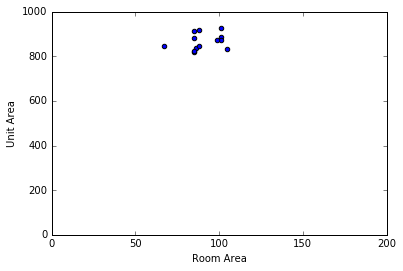

In [34]:
# visualization of room area vs unit areas
units=rotatedunitdata[['UnitType','UnitArea']]
room=raw_input('Enter room')
roomarea=[]
unitarea=[]
for index,row in units.iterrows():
    
    area=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)]['Area'].values
    if len(area)>0:
        roomarea.append(area[0])
        unitarea.append(row['UnitArea'])

plt.xlabel('Room Area')
plt.ylabel('Unit Area')
plt.axis([0,200,0,1000])
plt.scatter(roomarea,unitarea)
plt.show()




Enter roomKITCHEN


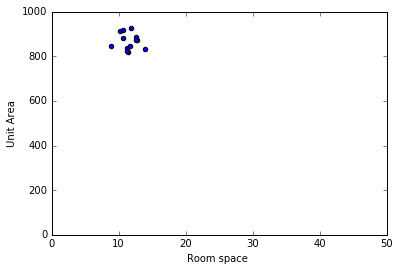

In [35]:
# visualization of unit area vs room Percentage space
units=rotatedunitdata[['UnitType','UnitArea']]
room=raw_input('Enter room')
roomspace=[]
unitarea=[]
for index,row in units.iterrows():
    
    percent=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)]['percentage'].values
    if len(percent)>0:
        roomspace.append(percent[0])
        unitarea.append(row['UnitArea'])

plt.xlabel('Room space ')
plt.ylabel('Unit Area')
plt.axis([0,50,0,1000])
plt.scatter(roomspace,unitarea)
plt.show()

Enter roomKITCHEN


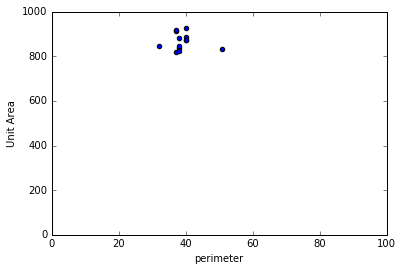

In [36]:
# visualization of unit  area vs room perimeter
units=rotatedunitdata[['UnitType','UnitArea']]
room=raw_input('Enter room')
roomperi=[]
unitarea=[]
for index,row in units.iterrows():
    
    perimeter=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)]['Perimeter'].values
    if len(perimeter)>0:
        roomperi.append(perimeter[0])
        unitarea.append(row['UnitArea'])

plt.xlabel('perimeter')
plt.ylabel('Unit Area')
plt.axis([0,100,0,1000])
plt.scatter(roomperi,unitarea)
plt.show()

Enter roomKITCHEN


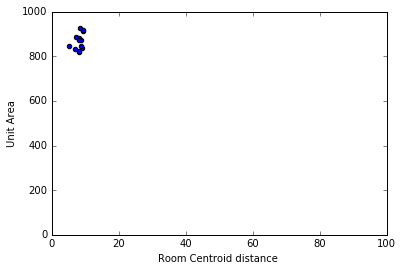

In [37]:
# visualization of unit area  vs room centroids distances 
from scipy.spatial import distance
units=rotatedunitdata[['UnitType','UnitArea','UnitCentroidX','UnitCentroidY']]
room=raw_input('Enter room')
roomdistance=[]
unitarea=[]
for index,row in units.iterrows():
    
    roomcentroid=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)][['CentroidX','CentroidY']].values
    
   
    if len(roomcentroid)>0:
        unitcentroid=row[['UnitCentroidX','UnitCentroidY']].values
        dist=distance.euclidean(roomcentroid[0],unitcentroid)
        roomdistance.append(dist)
        unitarea.append(row['UnitArea'])

plt.xlabel('Room Centroid distance ')
plt.ylabel('Unit Area')
plt.axis([0,100,0,1000])
plt.scatter(roomdistance,unitarea)
plt.show()

In [38]:
rooms=rotatedroomdata.Name.unique()
correlation=pd.DataFrame(index=rooms,columns=['RoomArea','RoomSpace','RoomPerimeter','RoomDistance'])
regression_coeff=pd.DataFrame(index=rooms,columns=['RoomArea','RoomSpace','RoomPerimeter','RoomDistance'])

In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [40]:
# Adds the correlation of unit area vs room area for each room
units=rotatedunitdata[['UnitType','UnitArea']]


for room in rooms:
    roomarea=[]
    unitarea=[]
    for index,row in units.iterrows():

        area=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)]['Area'].values
        if len(area)>0:
            roomarea.append(area[0])
            unitarea.append(row['UnitArea'])
    cor=np.corrcoef(roomarea,unitarea)[0][1]
    correlation.set_value(room,'RoomArea',cor)
    unitarea=[[x] for x in unitarea]
    roomarea=[[x] for x in roomarea]
    

    model=reg.fit(unitarea,roomarea)
    regression_coeff.set_value(room,'RoomArea',[model.intercept_[0],model.coef_[0][0]])

    



In [41]:
# Adds the correlation of unit area vs room percent space for each room
units=rotatedunitdata[['UnitType','UnitArea']]

for room in rooms:
    roomspace=[]
    unitarea=[]
    for index,row in units.iterrows():

        percent=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)]['percentage'].values
        if len(percent)>0:
            roomspace.append(percent[0])
            unitarea.append(row['UnitArea'])
    cor=np.corrcoef(roomspace,unitarea)[0][1]
    correlation.set_value(room,'RoomSpace',cor)
    
    unitarea=[[x] for x in unitarea]
    roomspace=[[x] for x in roomspace]
    
    
    model=reg.fit(unitarea,roomspace)
    regression_coeff.set_value(room,'RoomSpace',[model.intercept_[0],model.coef_[0][0]])



In [42]:
# Adds the correlation of unit area vs room perimeter for each room
units=rotatedunitdata[['UnitType','UnitArea']]

for room in rooms:
    roomperi=[]
    unitarea=[]
    for index,row in units.iterrows():

        perimeter=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)]['Perimeter'].values
        if len(perimeter)>0:
            roomperi.append(perimeter[0])
            unitarea.append(row['UnitArea'])
    cor=np.corrcoef(roomperi,unitarea)[0][1]
    correlation.set_value(room,'RoomPerimeter',cor)
    
    unitarea=[[x] for x in unitarea]
    roomperi=[[x] for x in roomperi]
    model=reg.fit(unitarea,roomperi)
    regression_coeff.set_value(room,'RoomPerimeter',[model.intercept_[0],model.coef_[0][0]])


In [43]:
#Adds correlation  of unit area  vs room centroids distances 
from scipy.spatial import distance
units=rotatedunitdata[['UnitType','UnitArea','UnitCentroidX','UnitCentroidY']]
for room in rooms:
    roomdistance=[]
    unitarea=[]
    for index,row in units.iterrows():

        roomcentroid=rotatedroomdata[(rotatedroomdata.UnitType==row.UnitType) &( rotatedroomdata.Name==room)][['CentroidX','CentroidY']].values


        if len(roomcentroid)>0:
            unitcentroid=row[['UnitCentroidX','UnitCentroidY']].values
            dist=distance.euclidean(roomcentroid[0],unitcentroid)
            roomdistance.append(dist)
            unitarea.append(row['UnitArea'])
    
    cor=np.corrcoef(roomdistance,unitarea)[0][1]
    correlation.set_value(room,'RoomDistance',cor)
    
    unitarea=[[x] for x in unitarea]
    roomdistance=[[x] for x in roomdistance]
    model=reg.fit(unitarea,roomdistance)
    regression_coeff.set_value(room,'RoomDistance',[model.intercept_[0],model.coef_[0][0]])




In [44]:
correlation

,RoomArea,RoomSpace,RoomPerimeter,RoomDistance
LIVING ROOM,0.387306,-0.0843153,0.203591,-0.178846
BEDROOM 2,0.843292,0.699471,0.834761,0.0634545
BATHROOM 2,0.623851,0.20647,0.56464,-0.548019
CLOSET 2,0.619657,0.478305,0.646471,-0.276479
BEDROOM 1,0.15419,-0.397922,0.193959,0.803328
ENTRY,0.361137,0.00410005,0.428299,-0.199513
KITCHEN,0.269893,-0.117481,-0.08973,0.394171
CLOSET 1,-0.140515,-0.315452,-0.118943,0.614903
BATHROOM 1,-0.342807,-0.587176,-0.378789,0.548383
UTILITY,0.0499169,-0.492683,-0.157455,0.466633


In [45]:
regression_coeff

,RoomArea,RoomSpace,RoomPerimeter,RoomDistance
LIVING ROOM,"[19.3004196782, 0.154523198881]","[22.9545097183, -0.00399099008447]","[38.793716484, 0.012833216756]","[8.9462684155, -0.0045712703793]"
BEDROOM 2,"[-285.527220797, 0.526064739255]","[-12.3776732791, 0.0392164824209]","[-17.7275005829, 0.0897159400016]","[11.2650825018, 0.00182516465863]"
BATHROOM 2,"[-21.7807472604, 0.0783350819927]","[3.65326305534, 0.00254824774631]","[6.63304383306, 0.0241946452164]","[26.4692621027, -0.0116885511408]"
CLOSET 2,"[-48.9512706925, 0.0807492033885]","[-3.2032882197, 0.00677173403542]","[-9.50544998834, 0.0315390145333]","[21.6102975604, -0.0066874404037]"
BEDROOM 1,"[115.172097225, 0.0562145410741]","[37.4095357471, -0.0190816871229]","[43.9803275822, 0.0171417191264]","[-11.3736503328, 0.0275679309567]"
ENTRY,"[-5.1653357426, 0.0722147742286]","[7.21543286101, 9.86388624404e-05]","[2.88939729541, 0.0371152949405]","[11.9242011485, -0.00488983504699]"
KITCHEN,"[22.906067848, 0.0778979171524]","[15.1750637108, -0.00423288947989]","[47.9461995803, -0.0104045231989]","[-2.5500400068, 0.0122518354388]"
CLOSET 1,"[34.7606959664, -0.0166656951892]","[7.15782363907, -0.00526588112194]","[25.7762298904, -0.00896673661304]","[-10.4186119079, 0.0296847592057]"
BATHROOM 1,"[88.5992947074, -0.0478792647859]","[17.57148866, -0.0133341325244]","[50.1187922593, -0.025238983446]","[-3.79049552784, 0.0227916088067]"
UTILITY,"[7.84028911168, 0.000893759229036]","[2.18142359624, -0.00125057946944]","[13.4888377244, -0.00224897023393]","[-19.5198461413, 0.0351365843622]"


In [46]:
unittype=rotatedunitdata.UnitType.values
Trainunit=list(set(unittype)-set(Testunit))

In [47]:
similarity=pd.DataFrame(index=Testunit,columns=Trainunit)
for eachtest in Testunit:
    
 
    for eachtrain in Trainunit:
        testshape=rotatedunitdata[rotatedunitdata.UnitType==eachtest]['shape'].values[0]
        
        trainshape=rotatedunitdata[rotatedunitdata.UnitType==eachtrain]['shape'].values[0]
        similarityscore=[]
        for i in range(0,18,3):
            
            eachsegmentsimilarityscore=np.corrcoef(testshape[i:i+3],trainshape[i:i+3])[0][1]
            similarityscore.append(eachsegmentsimilarityscore)
            similarity.set_value(eachtest,eachtrain,similarityscore)
     
        
            
                   
similarity    

,A,C,B,E,D,G,F,B4,B2,B3,D4,D2,D3
TEST A,"[0.999978102612, -0.413926978864, 0.8556498789...","[-0.821149714908, 0.807557713946, 0.7405619496...","[0.293637300526, 0.807557713946, 0.98541055984...","[0.995438641817, 0.807557713946, 0.97022968636...","[0.981396876805, 0.807557713946, 0.98541055984...","[0.293637300526, 0.807557713946, 0.77846509549...","[-0.692030578241, 0.807557713946, 0.9878202579...","[0.670140954155, 0.807557713946, 0.99612944310...","[0.999978102612, 0.807557713946, 0.9153857309,...","[-0.0591520174123, -0.807557713946, 0.73690556...","[-0.220262868219, 0.807557713946, 0.5749484261...","[-0.809666640037, 0.943629263554, 0.9999758463...","[0.999978102612, 0.807557713946, 0.94517412085..."
TEST B,"[0.990429128277, -0.871160395405, 0.6803725450...","[-0.738994147664, 1.0, 0.89678124849, 0.746859...","[0.416758237501, 1.0, 0.994226608359, 0.416758...","[0.999341327294, 1.0, 0.999424926942, 0.683194...","[0.947639232115, 1.0, 0.994226608359, 0.416758...","[0.416758237501, 1.0, 0.921043388983, 0.809358...","[-0.591124043903, 1.0, 0.9925306408, 0.3053690...","[0.761902345389, 1.0, 0.933570672764, 0.416758...","[0.990429128277, 1.0, 0.990793756245, 0.486840...","[-0.189873270991, -1.0, 0.522641974756, 0.9062...","[-0.090115033733, 1.0, 0.777748210805, 0.32025...","[-0.725484001835, 0.957257608432, 0.9633471857...","[0.990429128277, 1.0, 0.998535080735, 0.594553..."
TEST C,"[-0.638269619313, -0.871160395405, 0.738219617...","[0.96166327847, 1.0, 0.857445278175, 0.7468590...","[0.553978984804, 1.0, 0.999678671217, 0.416758...","[-0.556428611516, 1.0, 0.998836632189, 0.68319...","[-0.769986562701, 1.0, 0.999678671217, 0.41675...","[0.553978984804, 1.0, 0.885976138831, 0.809358...","[0.996907297803, 1.0, 0.999194341818, 0.305369...","[0.150196528414, 1.0, 0.959832979092, 0.416758...","[-0.638269619313, 1.0, 0.976342056758, 0.48684...","[-0.735211847689, -1.0, 0.590842956499, 0.9062...","[0.894472337493, 1.0, 0.723541481665, 0.320250...","[0.966914124438, 0.957257608432, 0.98211216926...","[-0.638269619313, 1.0, 0.990726756456, 0.59455..."
TEST D,"[0.156143628155, -0.640386577113, 0.9269807111...","[-0.687137062495, 0.934992203615, 0.6244517928...","[-0.901229852037, 0.934992203615, 0.9458791036...","[0.0545909964889, 0.934992203615, 0.9194583379...","[0.336649938232, 0.934992203615, 0.94587910364...","[-0.901229852037, 0.934992203615, 0.6689089106...","[-0.817274619415, 0.934992203615, 0.9505759026...","[-0.63362525935, 0.934992203615, 0.99744748090...","[0.156143628155, 0.934992203615, 0.83983992724...","[0.978165381958, -0.934992203615, 0.8349038304...","[-0.997415119586, 0.934992203615, 0.4377227750...","[-0.701414306047, 0.997611481214, 0.9861829432...","[0.156143628155, 0.934992203615, 0.88132100220..."
TEST E,"[-0.902078813922, -0.719064894747, 0.981913040...","[0.988085216651, 0.967636821893, 0.09926907137...","[0.154204292268, 0.967636821893, 0.61729227780...","[-0.853359218385, 0.967636821893, 0.5577761498...","[-0.966476756656, 0.967636821893, 0.6172922778...","[0.154204292268, 0.967636821893, 0.15709000525...","[0.938116135689, 0.967636821893, 0.62886210218...","[-0.277842022116, 0.967636821893, 0.7982203331...","[-0.902078813922, 0.967636821893, 0.4095781931...","[-0.383575793103, -0.967636821893, 0.999969254...","[0.624847096734, 0.967636821893, -0.1216303599...","[0.984837641713, 0.999265708814, 0.73750779672...","[-0.902078813922, 0.967636821893, 0.4826290110..."


In [48]:
testroomdata=pd.DataFrame(columns=['UnitType','Name','Area','CentroidDistance','Space','Perimeter'])
rooms=regression_coeff.index.tolist()


In [49]:
for room in rooms:
    for unit in Testunit:
        unitarea=rotatedunitdata[rotatedunitdata.UnitType==unit]['UnitArea'].values[0]
        
        
        coeffarea=regression_coeff.loc[room,'RoomArea']
        predictarea=coeffarea[0]+coeffarea[1]*unitarea
        
        coeffcentroiddistance=regression_coeff.loc[room,'RoomDistance']
        predictdistance=coeffcentroiddistance[0]+coeffcentroiddistance[1]*unitarea
        
        coeffroomspace=regression_coeff.loc[room,'RoomSpace']
        predictsapce=coeffroomspace[0]+coeffroomspace[1]*unitarea
        
        coeffperimeter=regression_coeff.loc[room,'RoomPerimeter']
        predictperimeter=coeffperimeter[0]+coeffperimeter[1]*unitarea
        testroomdata.loc[len(testroomdata)]=[unit,room,predictarea,predictdistance,predictsapce,predictperimeter]
    
        


In [50]:
testroomdata

,UnitType,Name,Area,CentroidDistance,Space,Perimeter
0,TEST A,LIVING ROOM,159.762007,4.790984,19.326700,50.459111
1,TEST B,LIVING ROOM,157.598683,4.854981,19.382574,50.279445
2,TEST C,LIVING ROOM,165.170319,4.630989,19.187015,50.908273
3,TEST D,LIVING ROOM,159.143915,4.809269,19.342664,50.407778
4,TEST E,LIVING ROOM,186.649044,3.995583,18.632267,52.692090
5,TEST A,BEDROOM 2,192.665627,12.924157,23.270109,63.824289
6,TEST B,BEDROOM 2,185.300721,12.898605,22.721078,62.568266
7,TEST C,BEDROOM 2,211.077893,12.988038,24.642686,66.964347
8,TEST D,BEDROOM 2,190.561368,12.916857,23.113243,63.465425
9,TEST E,BEDROOM 2,284.200892,13.241736,30.093777,79.434862


In [51]:
unrotatedroomdata =petl.todataframe(convertintrd)
unrotatedunitdata=petl.todataframe(convertintud)




In [52]:
unrotatedroomdata=pd.merge(unrotatedroomdata,unrotatedunitdata[['UnitType','UnitCentroidX','UnitCentroidY']],on='UnitType',how="inner")

In [53]:
from math import atan2,degrees
def calculatePolar(row):
    
    unitcentroidx=row['UnitCentroidX']
    unitcentroidy=row['UnitCentroidY']
    roomcentroidx=row['CentroidX']
    roomcentroidy=row['CentroidY']
   
    xDiff = roomcentroidx - unitcentroidx
    yDiff = roomcentroidy- unitcentroidy
    length=math.sqrt(xDiff**2+yDiff**2)
    angle=degrees(atan2(yDiff, xDiff))
    if angle<0:
        return (length,angle+360)
    else:
        return (length,angle)
  
 

In [54]:
unrotatedroomdata['polar']=unrotatedroomdata.apply(calculatePolar,axis=1)

In [55]:
unrotatedroomdata.head()

,UnitType,Name,Room Number,Area,Perimeter,CentroidX,CentroidY,UnitCentroidX,UnitCentroidY,polar
0,A,LIVING ROOM,RN004,145,49,-68,8,-69,12,"(4.12310562562, 284.036243468)"
1,A,BEDROOM 2,RN005,208,65,-81,4,-69,12,"(14.4222051019, 213.690067526)"
2,A,BATHROOM 2,RN006,59,32,-83,19,-69,12,"(15.6524758425, 153.434948823)"
3,A,CLOSET 2,RN007,35,23,-85,12,-69,12,"(16.0, 180.0)"
4,A,BEDROOM 1,RN008,148,55,-56,10,-69,12,"(13.152946438, 351.253837737)"


In [56]:
testroomdata.head()
testroomdata['polar']=None

In [57]:
def getQuadrant(angle):
    if angle<=60:
        return 0
    elif angle <=120:
        return 1
    elif angle <=180:
        return 2
    elif angle<=240:
        return 3
    elif angle <=300:
        return 4
    elif angle <=360:
        return 5

In [58]:
for testindex,testrow in testroomdata.iterrows():
    testunit=testrow['UnitType']
    roomname=testrow['Name']
    
    unrotatedrows=unrotatedroomdata[unrotatedroomdata.Name==roomname]
    
    
    xcoordinate=0
    ycoordinate=0
    weightedcoordinates=[]
    for trainindex,trainrow in unrotatedrows.iterrows():
        trainunit=trainrow['UnitType']
        polar=trainrow['polar']
        
        
        quadrant=getQuadrant(angle)
        
        weight=similarity.ix[testunit,trainunit][quadrant]
        weightedcoordinates.append((polar,weight))
        
    for element in weightedcoordinates:
        xcoordinate+=element[0][0]
        ycoordinate+=element[0][1]
        
    xcoordinate=xcoordinate/13* (1-element[1])
    ycoordinate=ycoordinate/13*(element[1])    

    coordinate=[xcoordinate,ycoordinate]
    testroomdata.set_value(testindex,'polar',coordinate)
   
    
            
        

In [59]:
testroomdata

,UnitType,Name,Area,CentroidDistance,Space,Perimeter,polar
0,TEST A,LIVING ROOM,159.762007,4.790984,19.326700,50.459111,"[3.51904393472, 53.1902150851]"
1,TEST B,LIVING ROOM,157.598683,4.854981,19.382574,50.279445,"[2.90566501929, 75.4926579541]"
2,TEST C,LIVING ROOM,165.170319,4.630989,19.187015,50.908273,"[2.22204194736, 100.349176694]"
3,TEST D,LIVING ROOM,159.143915,4.809269,19.342664,50.407778,"[9.47177899441, -163.251091006]"
4,TEST E,LIVING ROOM,186.649044,3.995583,18.632267,52.692090,"[4.21368831836, 27.9329617119]"
5,TEST A,BEDROOM 2,192.665627,12.924157,23.270109,63.824289,"[9.07529247994, 41.0726483576]"
6,TEST B,BEDROOM 2,185.300721,12.898605,22.721078,62.568266,"[7.49344435251, 58.2942443223]"
7,TEST C,BEDROOM 2,211.077893,12.988038,24.642686,66.964347,"[5.73044296949, 77.4880575444]"
8,TEST D,BEDROOM 2,190.561368,12.916857,23.113243,63.465425,"[24.4268518025, -126.059927454]"
9,TEST E,BEDROOM 2,284.200892,13.241736,30.093777,79.434862,"[10.8667168179, 21.5693941479]"


In [60]:
def calculate_shape(row):
    testunit=row['UnitType']
    testroom=row['Name']
   
    sim_dict=similarity.loc[:testunit].to_dict()
    test_shape_desc=np.zeros(18)
    for key in sim_dict:
        
        train_shape_desc=rotatedroomdata[(rotatedroomdata.UnitType==key) & (rotatedroomdata.Name==testroom )]['shape'].values[0]
        if not train_shape_desc:
            continue
        sim=sim_dict[key][testunit]
       
        train_shape_desc=np.array(train_shape_desc)
        sim=np.array(sim)
        
        j=0
        for i in range(0,18,3):
           
            train_shape_desc[i:i+3]=train_shape_desc[i:i+3]*sim[j]
           
            j+=1
        test_shape_desc=test_shape_desc+train_shape_desc
     
    test_shape_desc=test_shape_desc/13
    
    return list(test_shape_desc)


testroomdata['shape']=testroomdata.apply(calculate_shape,axis=1)

In [61]:
testroomdata

,UnitType,Name,Area,CentroidDistance,Space,Perimeter,polar,shape
0,TEST A,LIVING ROOM,159.762007,4.790984,19.326700,50.459111,"[3.51904393472, 53.1902150851]","[1.65682842299, 1.76315998055, 2.15869563723, ..."
1,TEST B,LIVING ROOM,157.598683,4.854981,19.382574,50.279445,"[2.90566501929, 75.4926579541]","[1.90979441533, 2.03236076679, 2.48895882371, ..."
2,TEST C,LIVING ROOM,165.170319,4.630989,19.187015,50.908273,"[2.22204194736, 100.349176694]","[0.525001411928, 0.558694833092, 0.68798333219..."
3,TEST D,LIVING ROOM,159.143915,4.809269,19.342664,50.407778,"[9.47177899441, -163.251091006]","[-1.76283871907, -1.8759737813, -2.30186900369..."
4,TEST E,LIVING ROOM,186.649044,3.995583,18.632267,52.692090,"[4.21368831836, 27.9329617119]","[-0.600064300369, -0.638575090509, -0.77959338..."
5,TEST A,BEDROOM 2,192.665627,12.924157,23.270109,63.824289,"[9.07529247994, 41.0726483576]","[2.25434816942, 2.4094793879, 2.9614144263, 4...."
6,TEST B,BEDROOM 2,185.300721,12.898605,22.721078,62.568266,"[7.49344435251, 58.2942443223]","[2.4290898785, 2.59388324046, 3.18619123054, 5..."
7,TEST C,BEDROOM 2,211.077893,12.988038,24.642686,66.964347,"[5.73044296949, 77.4880575444]","[-0.283349468692, -0.31675795386, -0.400315861..."
8,TEST D,BEDROOM 2,190.561368,12.916857,23.113243,63.465425,"[24.4268518025, -126.059927454]","[-1.12412701677, -1.18371406225, -1.4408152999..."
9,TEST E,BEDROOM 2,284.200892,13.241736,30.093777,79.434862,"[10.8667168179, 21.5693941479]","[-1.38043659229, -1.48329320068, -1.8292857408..."


In [62]:
def calculate_shape_end(row):
    shape_desc=row['shape']
    shape_end_points=[]
    angle=0
    for each_shape_desc in shape_desc:
        end_points=(each_shape_desc*math.cos(angle),each_shape_desc*math.sin(angle))
        shape_end_points.append((end_points))
        angle+=20
    
    return shape_end_points

testroomdata['shape_endpoints']=testroomdata.apply(calculate_shape_end,axis=1)

In [63]:
def calculate_end_point(row):
    shape_endpoints=row['shape_endpoints']
    
    endpoints=[]
    for i in range(len(shape_endpoints)-1):
        current_point=shape_endpoints[i]
        next_point=shape_endpoints[i+1]
        
        if current_point[0]==next_point[0] or current_point[1]==next_point[1]:
            endpoints.append(current_point)
        else:
            endpoints.append(current_point)
            endpoints.append((None,None))
    return endpoints

testroomdata['end_point']=testroomdata.apply(calculate_end_point,axis=1)

In [64]:
# Newly generated room boundaries
testroomdata

,UnitType,Name,Area,CentroidDistance,Space,Perimeter,polar,shape,shape_endpoints,end_point
0,TEST A,LIVING ROOM,159.762007,4.790984,19.326700,50.459111,"[3.51904393472, 53.1902150851]","[1.65682842299, 1.76315998055, 2.15869563723, ...","[(1.65682842299, 0.0), (0.719513960169, 1.6096...","[(1.65682842299, 0.0), (None, None), (0.719513..."
1,TEST B,LIVING ROOM,157.598683,4.854981,19.382574,50.279445,"[2.90566501929, 75.4926579541]","[1.90979441533, 2.03236076679, 2.48895882371, ...","[(1.90979441533, 0.0), (0.82936997206, 1.85543...","[(1.90979441533, 0.0), (None, None), (0.829369..."
2,TEST C,LIVING ROOM,165.170319,4.630989,19.187015,50.908273,"[2.22204194736, 100.349176694]","[0.525001411928, 0.558694833092, 0.68798333219...","[(0.525001411928, 0.0), (0.227993339413, 0.510...","[(0.525001411928, 0.0), (None, None), (0.22799..."
3,TEST D,LIVING ROOM,159.143915,4.809269,19.342664,50.407778,"[9.47177899441, -163.251091006]","[-1.76283871907, -1.8759737813, -2.30186900369...","[(-1.76283871907, -0.0), (-0.765551248579, -1....","[(-1.76283871907, -0.0), (None, None), (-0.765..."
4,TEST E,LIVING ROOM,186.649044,3.995583,18.632267,52.692090,"[4.21368831836, 27.9329617119]","[-0.600064300369, -0.638575090509, -0.77959338...","[(-0.600064300369, -0.0), (-0.260591039557, -0...","[(-0.600064300369, -0.0), (None, None), (-0.26..."
5,TEST A,BEDROOM 2,192.665627,12.924157,23.270109,63.824289,"[9.07529247994, 41.0726483576]","[2.25434816942, 2.4094793879, 2.9614144263, 4....","[(2.25434816942, 0.0), (0.983265316509, 2.1997...","[(2.25434816942, 0.0), (None, None), (0.983265..."
6,TEST B,BEDROOM 2,185.300721,12.898605,22.721078,62.568266,"[7.49344435251, 58.2942443223]","[2.4290898785, 2.59388324046, 3.18619123054, 5...","[(2.4290898785, 0.0), (1.05851722087, 2.368073...","[(2.4290898785, 0.0), (None, None), (1.0585172..."
7,TEST C,BEDROOM 2,211.077893,12.988038,24.642686,66.964347,"[5.73044296949, 77.4880575444]","[-0.283349468692, -0.31675795386, -0.400315861...","[(-0.283349468692, -0.0), (-0.129263238907, -0...","[(-0.283349468692, -0.0), (None, None), (-0.12..."
8,TEST D,BEDROOM 2,190.561368,12.916857,23.113243,63.465425,"[24.4268518025, -126.059927454]","[-1.12412701677, -1.18371406225, -1.4408152999...","[(-1.12412701677, -0.0), (-0.483052475122, -1....","[(-1.12412701677, -0.0), (None, None), (-0.483..."
9,TEST E,BEDROOM 2,284.200892,13.241736,30.093777,79.434862,"[10.8667168179, 21.5693941479]","[-1.38043659229, -1.48329320068, -1.8292857408...","[(-1.38043659229, -0.0), (-0.605305347606, -1....","[(-1.38043659229, -0.0), (None, None), (-0.605..."
